# pyg test


In [2]:
import torch
from torch import Tensor
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid

import networkx as nx
import matplotlib.pyplot as plt

d:\anaconda3\envs\pyg_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Karate club network

In [3]:
from torch_geometric.datasets import KarateClub

dataset =KarateClub()
print(f"dataset: {dataset}")
print(f"number of graphs: {len(dataset)}")
print(f"number of features: {dataset.num_features}")
print(f"number of classes: {dataset.num_classes}")

data = dataset[0] # get the first graph object

# x means 样本 * 特征
# edge_index=[2, 156] source -> target的对
# y是标签
# train_mask 计算损失的时候选择哪些点去计算损失
print(data)


dataset: KarateClub()
number of graphs: 1
number of features: 34
number of classes: 4
Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


edge_index
* `edge_index`: 存储图的连接关系 (start -> end)
* `dataset.num_features`: 每个点的特征
* `train_mask`: 表示哪些节点用来计算损失

In [4]:
data.train_mask

tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])

## 用networkx可视化展示


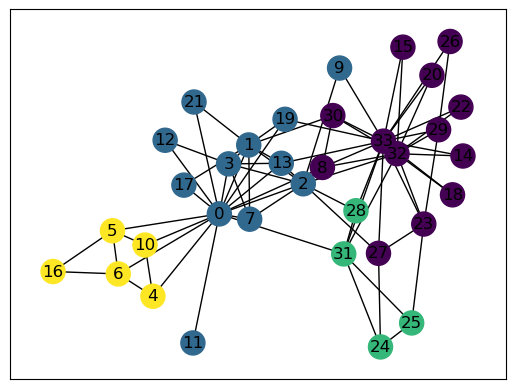

In [11]:
from torch_geometric.utils import to_networkx
G = to_networkx(data,to_undirected=True)
def plot_graph(G,labels):
    nx.draw_networkx(G,node_color=labels)
    plt.xticks([])
    plt.yticks([])
    plt.show()

plot_graph(G,labels=data.y)

## 定义一个GCN网络


In [14]:
import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv

class GCN(nn.Module):
    def __init__(self, input_channels, output_channels) -> None:
        super().__init__()

        torch.manual_seed(42)
        self.conv_block1 = nn.Sequential(
            GCNConv(input_channels, 4),
            nn.Tanh()
        ) 
        
        self.conv_block2 = nn.Sequential(
            GCNConv(4,4),
            nn.Tanh()
        ) 

        self.conv_block3 = nn.Sequential(
            GCNConv(4,2),
            nn.Tanh()
        ) 

        self.fc = nn.Linear(2,output_channels)

    def forward(self, x, edge_index): # 输入特征与邻接矩阵
        x = self.conv_block1(x,edge_index)
        x = self.conv_block2(x,edge_index)
        x = self.conv_block3(x,edge_index)

        return self.fc(x), x
    
model = GCN(dataset.num_features,dataset.num_classes)
print(model)

GCN(
  (conv_block1): Sequential(
    (0): GCNConv(34, 4)
    (1): Tanh()
  )
  (conv_block2): Sequential(
    (0): GCNConv(4, 4)
    (1): Tanh()
  )
  (conv_block3): Sequential(
    (0): GCNConv(4, 2)
    (1): Tanh()
  )
  (fc): Linear(in_features=2, out_features=4, bias=True)
)
